In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("D:/Data Analysis/powerlifting_dataset.csv")

In [3]:
data.head()

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
0,Jessica Wilson,46,59 kg,Bench Press,269
1,John Doe,60,83 kg,Bench Press,179
2,Emily Davis,41,105 kg,Bench Press,235
3,Emily Davis,33,66 kg,Squat,359
4,Laura Taylor,56,74 kg,Deadlift,221


In [4]:
data.tail()

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
2995,John Doe,46,74 kg,Bench Press,246
2996,Daniel Lee,39,Open,Deadlift,244
2997,Sarah Thomas,62,Open,Squat,148
2998,Chris Brown,32,93 kg,Bench Press,333
2999,Daniel Lee,22,83 kg,Deadlift,280


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Lifter Name         3000 non-null   object
 1   Age                 3000 non-null   int64 
 2   Weight Class        3000 non-null   object
 3   Lift Type           3000 non-null   object
 4   Amount Lifted (kg)  3000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 117.3+ KB


In [6]:
data.describe()

,Age,Amount Lifted (kg)
count,3000.000000,3000.000000
mean,41.064000,250.332667
std,13.682628,86.281208
min,18.000000,100.000000
25%,29.000000,176.750000
50%,41.000000,250.000000
75%,53.000000,325.250000
max,64.000000,399.000000


In [7]:
data.isnull()

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2995,False,False,False,False,False
2996,False,False,False,False,False
2997,False,False,False,False,False
2998,False,False,False,False,False


In [8]:
data.isnull().sum()

Lifter Name           0
Age                   0
Weight Class          0
Lift Type             0
Amount Lifted (kg)    0
dtype: int64

In [9]:
data.columns

Index(['Lifter Name', 'Age', 'Weight Class', 'Lift Type',
       'Amount Lifted (kg)'],
      dtype='object')

In [10]:
data["Amount Lifted (kg)"].max()

399

In [11]:
#top 5 highest weight lifted from the list
data1 = data.nlargest(5, "Amount Lifted (kg)")
print(data1)

          Lifter Name  Age Weight Class    Lift Type  Amount Lifted (kg)
585        Jane Smith   58        74 kg     Deadlift                 399
1207  Michael Johnson   51        93 kg  Bench Press                 399
1409       Daniel Lee   24        66 kg        Squat                 399
1727     Sarah Thomas   51        59 kg     Deadlift                 399
2105  Michael Johnson   57        93 kg        Squat                 399


In [12]:
#count of list types and names
data["Lift Type"].value_counts()

Lift Type
Deadlift       1025
Bench Press    1011
Squat           964
Name: count, dtype: int64

In [13]:
#age group above 50
data[data["Age"] > 50]

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
1,John Doe,60,83 kg,Bench Press,179
4,Laura Taylor,56,74 kg,Deadlift,221
5,Sarah Thomas,56,74 kg,Squat,264
8,Michael Johnson,55,93 kg,Squat,265
12,Matthew Anderson,64,74 kg,Bench Press,398
...,...,...,...,...,...
2989,Chris Brown,56,52 kg,Deadlift,182
2991,John Doe,64,93 kg,Deadlift,263
2992,John Doe,51,52 kg,Bench Press,170
2994,Sarah Thomas,62,105 kg,Bench Press,191


In [14]:
#above 100+ weight class
data['Weight Class'] = data['Weight Class'].replace('Open',np.nan)
data['Weight Class'] = data['Weight Class'].str.replace('kg','').astype(float)
data[data["Weight Class"] > 100]

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
2,Emily Davis,41,105.0,Bench Press,235
7,Jessica Wilson,25,120.0,Bench Press,178
13,Matthew Anderson,47,120.0,Bench Press,396
17,Laura Taylor,62,105.0,Deadlift,273
18,Matthew Anderson,40,120.0,Bench Press,120
...,...,...,...,...,...
2972,Laura Taylor,25,120.0,Bench Press,316
2981,Laura Taylor,37,105.0,Squat,231
2984,Daniel Lee,56,105.0,Deadlift,137
2987,John Doe,60,105.0,Bench Press,287


In [15]:
#output of only deadlifts
data[data["Lift Type"] == "Deadlift"]

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
4,Laura Taylor,56,74.0,Deadlift,221
6,Emily Davis,40,83.0,Deadlift,132
10,Laura Taylor,31,52.0,Deadlift,328
11,Daniel Lee,38,52.0,Deadlift,347
15,Daniel Lee,37,59.0,Deadlift,133
...,...,...,...,...,...
2989,Chris Brown,56,52.0,Deadlift,182
2990,Laura Taylor,23,NaN,Deadlift,287
2991,John Doe,64,93.0,Deadlift,263
2996,Daniel Lee,39,NaN,Deadlift,244


<Axes: xlabel='Lift Type', ylabel='count'>

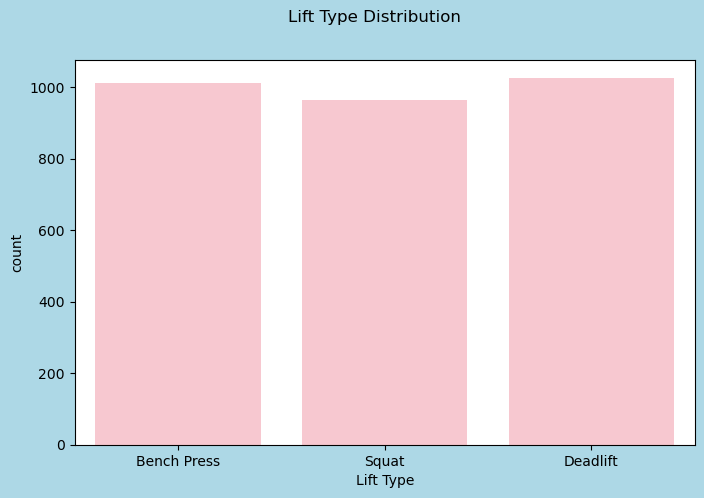

In [16]:
#Lift Type Distribution
plt.figure(figsize=(8, 5),facecolor="lightblue")
plt.suptitle('Lift Type Distribution')
sns.countplot(data=data,x='Lift Type', color='pink')

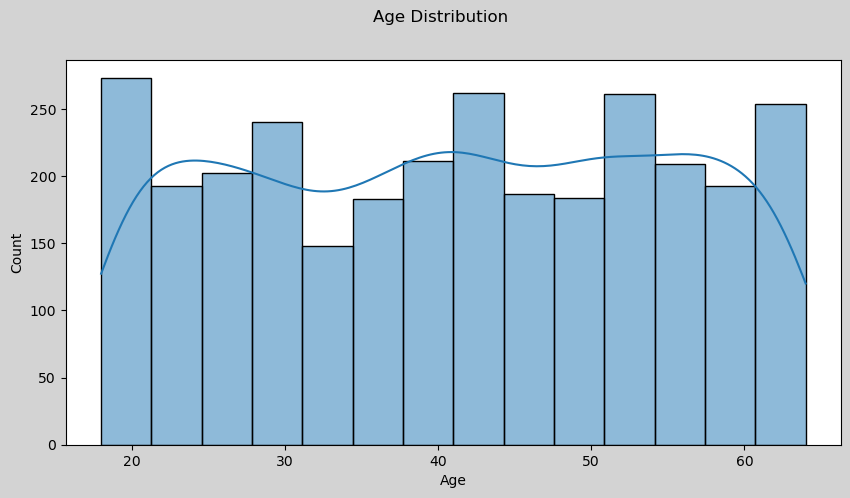

In [17]:
#Age Distribution
plt.figure(figsize=(10, 5),facecolor='lightgrey')
plt.suptitle('Age Distribution')
sns.histplot(data['Age'], kde=True)
plt.show()

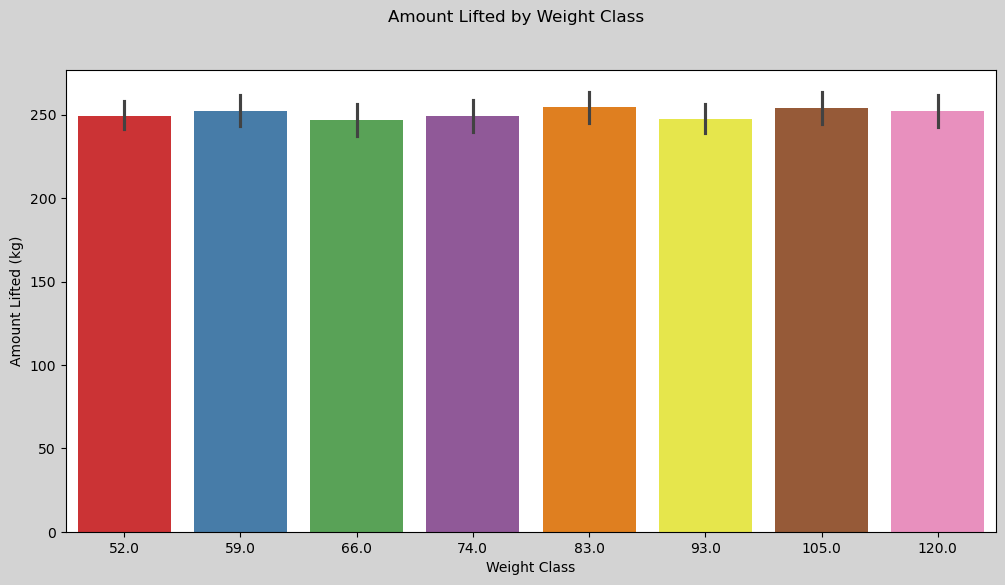

In [18]:
#Amount Lifted by Weight Class
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(12,6),facecolor="lightgrey")
plt.suptitle('Amount Lifted by Weight Class')
sns.barplot(x='Weight Class', y='Amount Lifted (kg)', data=data, palette='Set1')
plt.show()

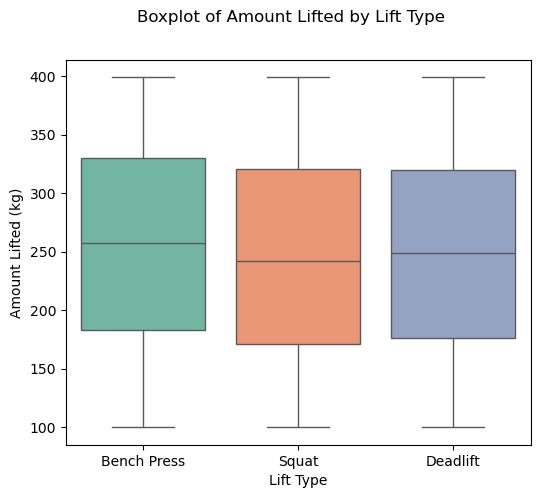

In [19]:
#Boxplot of Amount Lifted by Lift Type
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(6, 5))
sns.boxplot(x='Lift Type', y='Amount Lifted (kg)', data=data, palette='Set2')
plt.suptitle('Boxplot of Amount Lifted by Lift Type')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1400x600 with 0 Axes>

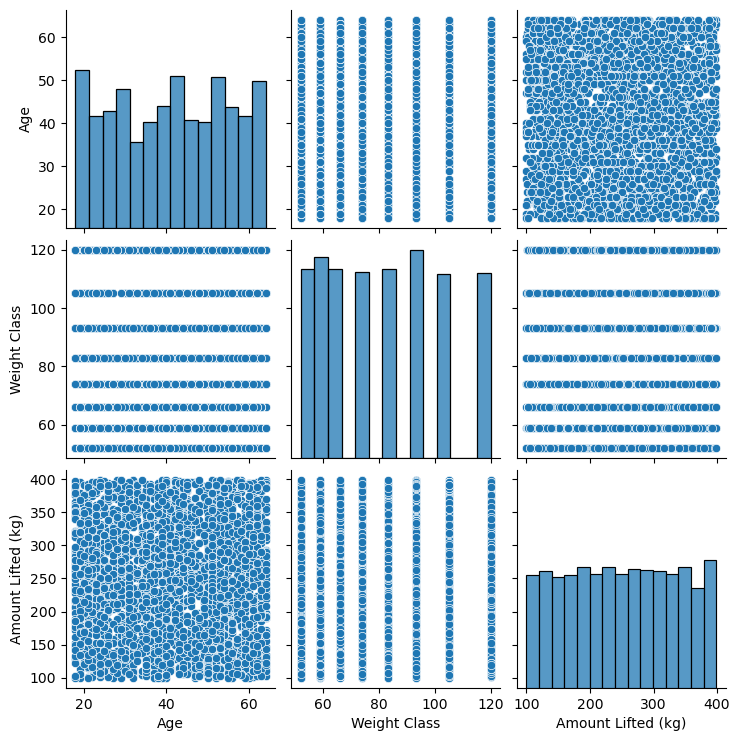

In [20]:
plt.figure(figsize=(14,6),facecolor="lightgrey")
plt.suptitle('Pairplot')
sns.pairplot(data=data)
plt.show

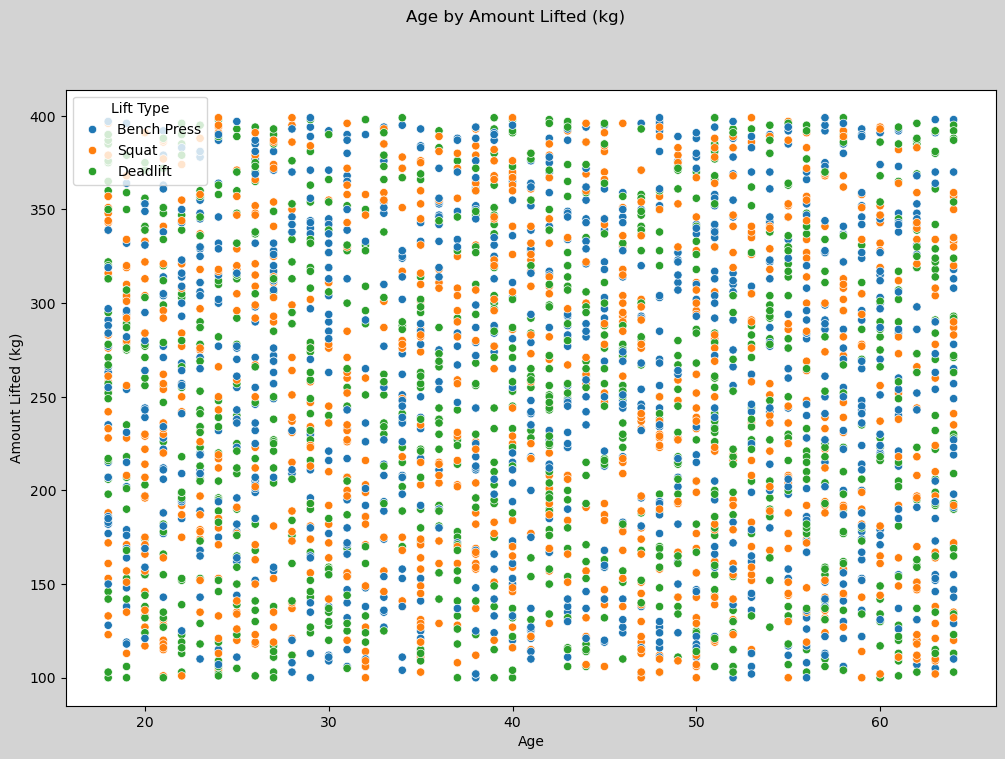

In [21]:
#Distribution of Age by Amount Lifted (kg)
plt.figure(figsize=(12,8),facecolor="lightgrey")
sns.scatterplot(x='Age', y='Amount Lifted (kg)', hue='Lift Type', data=data)
plt.suptitle('Age by Amount Lifted (kg)')
plt.show()